<a href="https://colab.research.google.com/github/KietHuynh02/GiuaKy/blob/main/Money_VietNam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

folder = 'drive/MyDrive/Money/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('1000Dong '):
    output = 1.0
  if file.startswith('2000Dong '):
    output = 2.0
  if file.startswith('5000Dong '):
    output = 3.0
  if file.startswith('10000Dong '):
    output = 4.0
  if file.startswith('20000Dong '):
    output = 5.0
  if file.startswith('50000Dong '):
    output = 6.0
  if file.startswith('100000Dong '):
    output = 7.0
  if file.startswith('200000Dong '):
    output = 8.0
  if file.startswith('500000Dong '):
    output = 9.0
  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
# Train
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape,labels_train.shape)

(1444, 128, 128, 3) (1444,)


In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array

folder = 'drive/MyDrive/Money_Test/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('1000Dong '):
    output = 1.0
  if file.startswith('2000Dong '):
    output = 2.0
  if file.startswith('5000Dong '):
    output = 3.0
  if file.startswith('10000Dong '):
    output = 4.0
  if file.startswith('20000Dong '):
    output = 5.0
  if file.startswith('50000Dong '):
    output = 6.0
  if file.startswith('100000Dong '):
    output = 7.0
  if file.startswith('200000Dong '):
    output = 8.0
  if file.startswith('500000Dong '):
    output = 9.0
  photo = load_img(folder + file, target_size =(128,128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
# Test
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape,labels_test.shape)

(522, 128, 128, 3) (522,)


In [ ]:
class_Money =    {1: '1000Dong',2: '2000Dong',3: '5000Dong',
                  4: '10000Dong',5: '20000Dong',6: '50000Dong',
                  7: '100000Dong',8: '200000Dong',9: '500000Dong' }

In [ ]:
# Reshape the sets and rescale within the byte range
photos_train = photos_train.reshape(1444,128,128,3)
photos_train = photos_train.astype('float32')/255
photos_test = photos_test.reshape(522, 128, 128, 3)
photos_test = photos_test.astype('float32')/255

In [ ]:
# One-hot encode the target classes
from keras.utils import to_categorical 
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

In [ ]:
(photos_train.shape, labels_train.shape),(photos_test.shape, labels_test.shape)

(((1444, 128, 128, 3), (1444, 10)), ((522, 128, 128, 3), (522, 10)))

In [ ]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.models import Sequential,Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

batch_size = 64
epochs = 50
classes = 10

model = Sequential()
# CNN
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))
#_________________________________________________________

model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#__________________________________________________________

model.add(Conv2D(128,(3,3),activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
#__________________________________________________________

model.add(Conv2D(256,(3,3),activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
#__________________________________________________________

model.add(Conv2D(512,(3,3),activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding= 'same'))
# ANN
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(128,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(64,activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes ,activation = 'softmax'))

# Compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac cua ham', test_acc)
print('Ham mat mat', test_loss)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

In [ ]:
model.save('drive/MyDrive/modelMoney.h5')

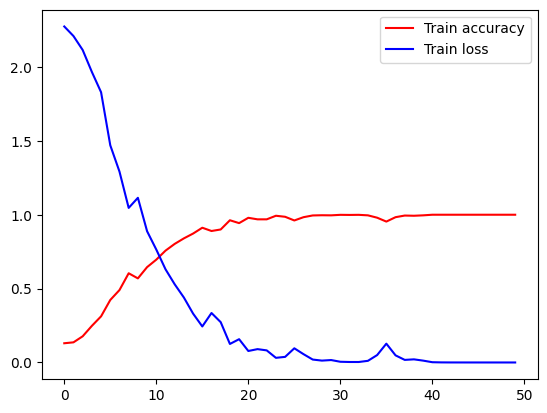

In [ ]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

1/1 [==============================] - 0s 22ms/step
Predicted:  20000Dong


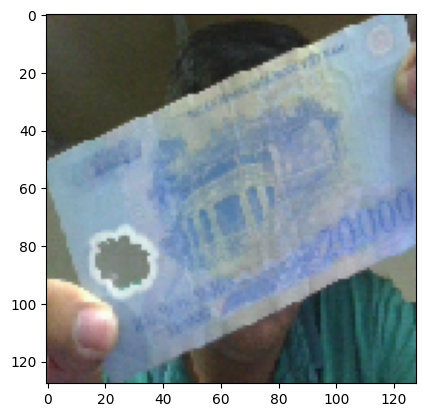

In [ ]:
#test
import numpy as np
filePath = '/content/drive/MyDrive/20000Dong.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Money[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 21ms/step
Predicted:  50000Dong


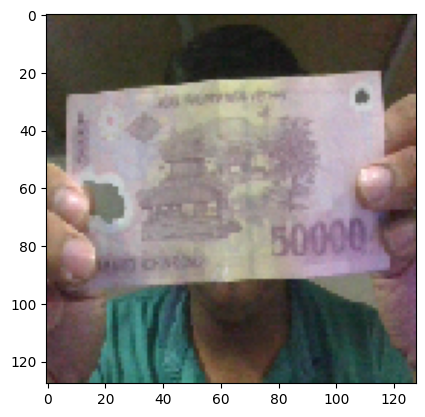

In [ ]:
#test
filePath = '/content/drive/MyDrive/50000.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Money[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 29ms/step
Predicted:  2000Dong


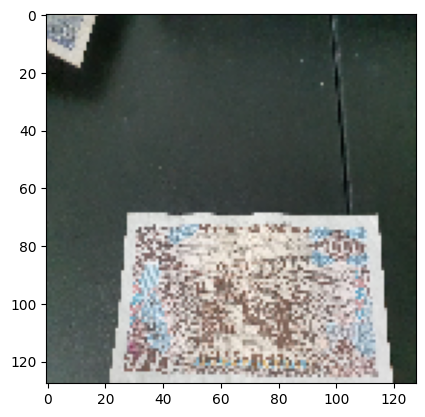

In [ ]:

filePath = '/content/drive/MyDrive/2000.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Money[pred_value])
plt.imshow(testImage)